# Analysing

Rank anaylsis

In [288]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt 
 

In [289]:
GENS = 300 #hay una generación más, la que contiene el PF
population = 100


In [290]:
df = pd.read_csv("../examples/fpp/test_500g.csv")
df.head()

def clean_parents(item):
    item = list(eval(item))
    return pd.Series([item[0], item[1]])

df[["parent1","parent2"]]=df["parent"].apply(clean_parents)

In [291]:
df.drop(df[df.iter==GENS].index,inplace=True) #these samples are in the GENS+1 

In [292]:
df.loc[df.iter==GENS+1,"iter"]=GENS #we change the GENS+1 to GEN 

In [293]:
df[df.pf==False]

,iter,idx,n_gen,n_iter,rank,crowding,parent,mutate,mutate_rate,pf,parent1,parent2
30002,300,294_40,294,294,1,0.0,"['279_75', '268_29']",True,M2,False,279_75,268_29
30003,300,274_13,274,274,1,0.0,"['270_13', '273_94']",True,M2,False,270_13,273_94
30004,300,288_65,288,288,1,0.0,"['277_75', '287_96']",NaN,NaN,False,277_75,287_96
30005,300,296_16,296,296,1,0.0,"['289_49', '283_93']",NaN,NaN,False,289_49,283_93
30006,300,299_43,299,299,1,0.0,"['263_95', '262_62']",NaN,NaN,False,263_95,262_62
...,...,...,...,...,...,...,...,...,...,...,...,...
30095,300,266_74,266,266,1,0.0,"['263_21', '265_24']",NaN,NaN,False,263_21,265_24
30096,300,299_20,299,299,1,0.0,"['297_64', '297_33']",NaN,NaN,False,297_64,297_33
30097,300,291_81,291,291,1,0.0,"['286_17', '287_57']",NaN,NaN,False,286_17,287_57
30098,300,294_5,294,294,1,0.0,"['268_29', '279_75']",NaN,NaN,False,268_29,279_75


In [294]:
# df.loc[df.pf=="nan","pf"]=False
df.pf.fillna(False,inplace=True)
df.loc[df.pf=="true","pf"]=True
df.loc[df.pf=="false","pf"]=False

In [295]:
df["mutate_rate"].fillna("-",inplace=True)

In [296]:
print((df.pf==True).all())
df.head()

False


,iter,idx,n_gen,n_iter,rank,crowding,parent,mutate,mutate_rate,pf,parent1,parent2
0,1,1_63,1,1,0,inf,"['0', '0']",NaN,-,False,0,0
1,1,1_65,1,1,0,inf,"['0', '0']",NaN,-,False,0,0
2,1,1_66,1,1,0,1.0,"['0', '0']",NaN,-,False,0,0
3,1,1_29,1,1,1,1.0,"['0', '0']",NaN,-,False,0,0
4,1,1_39,1,1,1,inf,"['0', '0']",NaN,-,False,0,0


In [297]:
df.tail()

,iter,idx,n_gen,n_iter,rank,crowding,parent,mutate,mutate_rate,pf,parent1,parent2
30095,300,266_74,266,266,1,0.0,"['263_21', '265_24']",NaN,-,False,263_21,265_24
30096,300,299_20,299,299,1,0.0,"['297_64', '297_33']",NaN,-,False,297_64,297_33
30097,300,291_81,291,291,1,0.0,"['286_17', '287_57']",NaN,-,False,286_17,287_57
30098,300,294_5,294,294,1,0.0,"['268_29', '279_75']",NaN,-,False,268_29,279_75
30099,300,299_13,299,299,1,0.0,"['294_5', '290_2']",NaN,-,False,294_5,290_2


In [298]:
mask = df.groupby(by=["idx"],as_index=False)["iter"].agg([min,max])
mask["lifeIter"] = mask["max"]-mask["min"]
dfMutates = df[["idx","mutate"]].drop_duplicates()
dfMutates.fillna(False,inplace=True)
df2 = pd.merge(mask,dfMutates,on=["idx"],how="inner")

dft = pd.merge(df,df2,on=["idx"],how="inner")

In [299]:
dft["name"]=dft["idx"]+"_"+dft["iter"].astype(str)
print(dft.shape)

(30000, 17)


In [300]:
dft.head()

,iter,idx,n_gen,n_iter,rank,crowding,parent,mutate_x,mutate_rate,pf,parent1,parent2,min,max,lifeIter,mutate_y,name
0,1,1_63,1,1,0,inf,"['0', '0']",NaN,-,False,0,0,1,3,2,False,1_63_1
1,2,1_63,1,1,2,inf,"['0', '0']",NaN,-,False,0,0,1,3,2,False,1_63_2
2,3,1_63,1,1,5,inf,"['0', '0']",NaN,-,False,0,0,1,3,2,False,1_63_3
3,1,1_65,1,1,0,inf,"['0', '0']",NaN,-,False,0,0,1,4,3,False,1_65_1
4,2,1_65,1,1,1,0.348895,"['0', '0']",NaN,-,False,0,0,1,4,3,False,1_65_2


In [301]:
dft.tail(10)

,iter,idx,n_gen,n_iter,rank,crowding,parent,mutate_x,mutate_rate,pf,parent1,parent2,min,max,lifeIter,mutate_y,name
29990,300,299_13,299,299,1,0.0,"['294_5', '290_2']",NaN,-,False,294_5,290_2,299,300,1,False,299_13_300
29991,299,299_20,299,299,1,0.0,"['297_64', '297_33']",NaN,-,False,297_64,297_33,299,300,1,False,299_20_299
29992,300,299_20,299,299,1,0.0,"['297_64', '297_33']",NaN,-,False,297_64,297_33,299,300,1,False,299_20_300
29993,299,299_43,299,299,1,0.0,"['263_95', '262_62']",NaN,-,False,263_95,262_62,299,300,1,False,299_43_299
29994,300,299_43,299,299,1,0.0,"['263_95', '262_62']",NaN,-,False,263_95,262_62,299,300,1,False,299_43_300
29995,299,299_50,299,299,1,0.0,"['294_81', '274_13']",NaN,-,False,294_81,274_13,299,300,1,False,299_50_299
29996,300,299_50,299,299,1,0.0,"['294_81', '274_13']",NaN,-,False,294_81,274_13,299,300,1,False,299_50_300
29997,299,299_70,299,299,2,inf,"['278_83', '294_5']",NaN,-,False,278_83,294_5,299,299,0,False,299_70_299
29998,300,300_29,300,300,1,0.0,"['297_98', '286_61']",NaN,-,False,297_98,286_61,300,300,0,False,300_29_300
29999,300,300_42,300,300,1,0.0,"['297_98', '286_61']",NaN,-,False,297_98,286_61,300,300,0,False,300_42_300


In [302]:
import networkx as nx
edgesp1 = zip(dft["parent1"],dft["idx"])
edgesp2 = zip(dft["parent2"],dft["idx"])

G = nx.Graph()
G.add_edges_from(edgesp1)
G.add_edges_from(edgesp2)
G.remove_node("0")

dft['degree'] = dft['idx'].map(G.degree)
dft.head()
print(len(G.nodes))

6918


In [303]:
G.nodes()


NodeView(('1_63', '1_65', '1_66', '1_29', '1_39', '1_12', '1_75', '1_84', '1_13', '1_34', '1_52', '1_58', '1_73', '1_86', '1_31', '1_69', '1_45', '1_85', '1_96', '1_72', '1_68', '1_49', '1_2', '1_9', '1_38', '1_60', '1_71', '1_74', '1_82', '1_92', '1_37', '1_41', '1_42', '1_90', '1_16', '1_94', '1_15', '1_5', '1_43', '1_20', '1_32', '1_33', '1_99', '1_27', '1_81', '1_21', '1_53', '1_88', '1_25', '1_55', '1_14', '1_77', '1_19', '1_22', '1_70', '1_51', '1_61', '1_87', '1_7', '1_40', '1_56', '1_8', '1_0', '1_35', '1_28', '1_1', '1_59', '1_57', '1_78', '1_83', '1_17', '1_18', '1_98', '1_44', '1_4', '1_26', '1_97', '1_64', '1_48', '1_67', '1_3', '1_46', '1_47', '1_50', '1_54', '1_89', '1_11', '1_10', '1_23', '1_36', '1_76', '1_80', '1_93', '1_62', '1_95', '1_30', '1_91', '1_6', '1_24', '1_79', '2_7', '2_38', '2_41', '2_46', '2_70', '2_71', '2_72', '2_87', '2_76', '2_90', '2_96', '2_65', '2_60', '2_73', '2_92', '2_40', '2_95', '2_2', '2_35', '2_78', '2_84', '2_79', '2_3', '2_74', '2_83', '2_

In [304]:
nodes_pf = dft[dft["pf"]==True]


In [305]:
personalization =  dict(zip(nodes_pf.idx,len(nodes_pf)*[100]))
ranks_pr = nx.pagerank(G)
# ranks_pr = nx.pagerank(G,personalization=personalization)
ranks_pr

{'1_63': 0.00012382110819810017,
 '1_65': 0.0002944421451696537,
 '1_66': 0.0003828421769096858,
 '1_29': 0.00018319334252688403,
 '1_39': 0.00020068605728996335,
 '1_12': 0.00022019692621110855,
 '1_75': 0.0001904765336892821,
 '1_84': 0.00023066061777306685,
 '1_13': 2.17977315827333e-05,
 '1_34': 0.0001024637597067269,
 '1_52': 0.00023583540276253979,
 '1_58': 5.658720314282947e-05,
 '1_73': 0.0001940378841010445,
 '1_86': 0.00011712541510764043,
 '1_31': 0.00014695419389790628,
 '1_69': 0.00019089642463483315,
 '1_45': 0.00013324440205317217,
 '1_85': 0.0001530046975058789,
 '1_96': 6.580881817891385e-05,
 '1_72': 0.00017095978585968336,
 '1_68': 8.502941865667491e-05,
 '1_49': 0.0001870110938517345,
 '1_2': 9.296672145094353e-05,
 '1_9': 0.00011322169802487287,
 '1_38': 7.695520650373947e-05,
 '1_60': 6.101160229840606e-05,
 '1_71': 6.580881817891385e-05,
 '1_74': 0.00013457899558412748,
 '1_82': 0.00015962186085214785,
 '1_92': 0.00012382110819810017,
 '1_37': 2.17977315827333e-0

In [306]:

dft['pageRank']=dft.idx.map(ranks_pr)

In [307]:
dft

,iter,idx,n_gen,n_iter,rank,crowding,parent,mutate_x,mutate_rate,pf,parent1,parent2,min,max,lifeIter,mutate_y,name,degree,pageRank
0,1,1_63,1,1,0,inf,"['0', '0']",NaN,-,False,0,0,1,3,2,False,1_63_1,3,0.000124
1,2,1_63,1,1,2,inf,"['0', '0']",NaN,-,False,0,0,1,3,2,False,1_63_2,3,0.000124
2,3,1_63,1,1,5,inf,"['0', '0']",NaN,-,False,0,0,1,3,2,False,1_63_3,3,0.000124
3,1,1_65,1,1,0,inf,"['0', '0']",NaN,-,False,0,0,1,4,3,False,1_65_1,8,0.000294
4,2,1_65,1,1,1,0.348895,"['0', '0']",NaN,-,False,0,0,1,4,3,False,1_65_2,8,0.000294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,299,299_50,299,299,1,0.000000,"['294_81', '274_13']",NaN,-,False,294_81,274_13,299,300,1,False,299_50_299,2,0.000084
29996,300,299_50,299,299,1,0.000000,"['294_81', '274_13']",NaN,-,False,294_81,274_13,299,300,1,False,299_50_300,2,0.000084
29997,299,299_70,299,299,2,inf,"['278_83', '294_5']",NaN,-,False,278_83,294_5,299,299,0,False,299_70_299,2,0.000085
29998,300,300_29,300,300,1,0.000000,"['297_98', '286_61']",NaN,-,False,297_98,286_61,300,300,0,False,300_29_300,2,0.000088


/Users/isaac/.pyenv/versions/3.11.0rc2/envs/my3110/lib/python3.11/site-packages/seaborn/categorical.py:3398: UserWarning: 97.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/isaac/.pyenv/versions/3.11.0rc2/envs/my3110/lib/python3.11/site-packages/seaborn/categorical.py:3398: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/isaac/.pyenv/versions/3.11.0rc2/envs/my3110/lib/python3.11/site-packages/seaborn/categorical.py:3398: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/isaac/.pyenv/versions/3.11.0rc2/envs/my3110/lib/python3.11/site-packages/seaborn/categorical.py:3398: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use s

[Text(47.097222222222214, 0.5, '')]

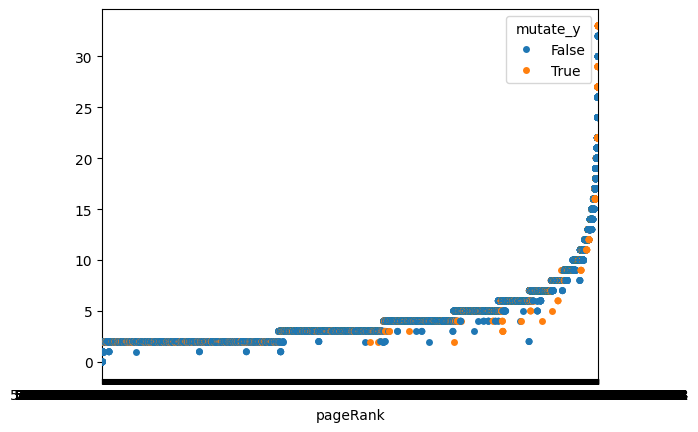

In [308]:
import seaborn as sns
# ax = sns.swarmplot(data=dft, x="pageRank", y="degree", hue="mutate_y")
# ax.set(ylabel="")

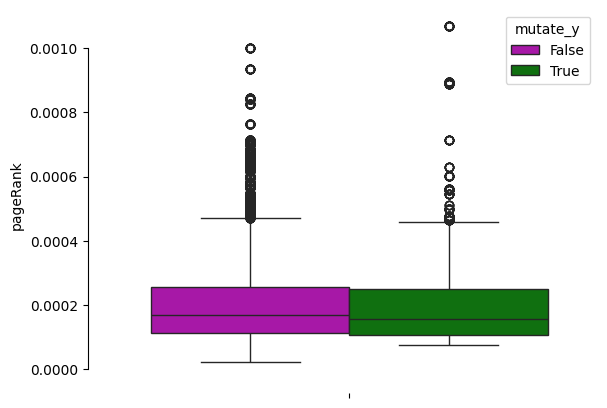

In [312]:
sns.boxplot(y="pageRank",
            hue="mutate_y", palette=["m", "g"],
            data=dft)
sns.despine(offset=10, trim=True)

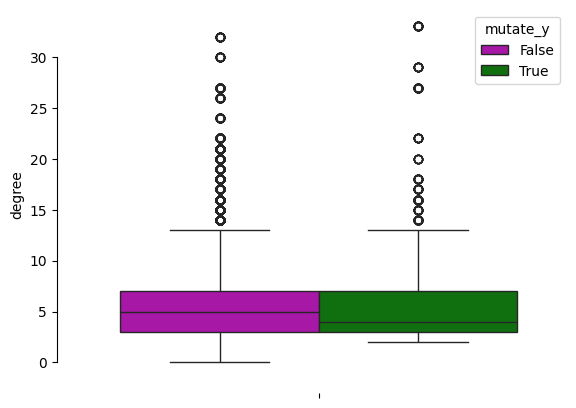

In [313]:
sns.boxplot(y="degree",
            hue="mutate_y", palette=["m", "g"],
            data=dft)
sns.despine(offset=10, trim=True)

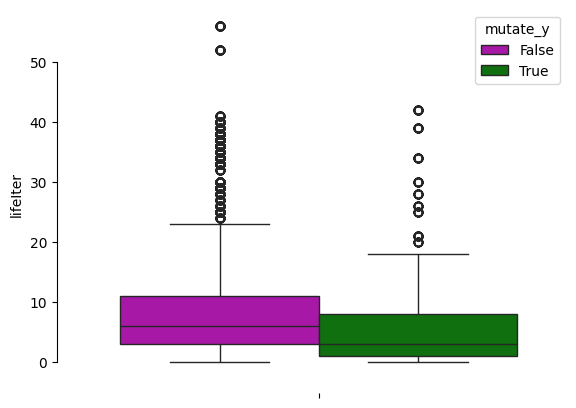

In [314]:
sns.boxplot(y="lifeIter",
            hue="mutate_y", palette=["m", "g"],
            data=dft)

sns.despine(offset=10, trim=True)

In [315]:
val, frec = np.unique(dft.mutate_y,return_counts=True)
print(val,frec)

[False  True] [25822  4178]


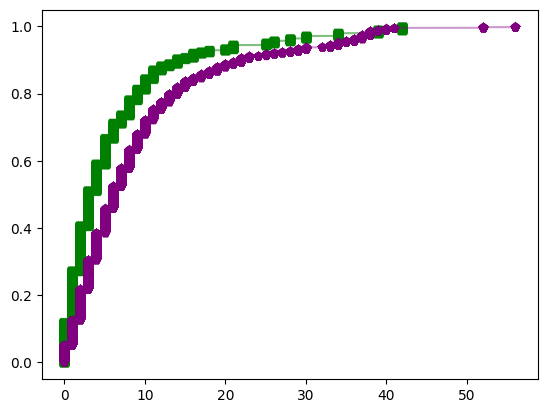

In [316]:
def get_cdf(data):
    N = len(data)
    x = np.sort(data)
    y = np.arange(N)/float(N)
    return x,y

x,y = get_cdf(dft["lifeIter"].values)
xm,ym = get_cdf(dft[dft["mutate_y"]==True]["lifeIter"])
xnm,ynm = get_cdf(dft[dft["mutate_y"]==False]["lifeIter"])
# plt.plot(x, y, marker='o',markersize=10) 
plt.plot(xm, ym, marker='s',alpha=0.5,color="green") 
plt.plot(xnm, ynm, marker='p',alpha=0.4,color="purple") 

In [317]:

dr = dft.groupby(["n_gen","mutate_y","mutate_rate"]).agg({"pageRank":np.mean}).reset_index()
dr

,n_gen,mutate_y,mutate_rate,pageRank
0,1,False,-,0.000107
1,2,False,-,0.000193
2,2,True,M1,0.000173
3,2,True,M2,0.000214
4,3,False,-,0.000148
...,...,...,...,...
648,298,False,-,0.000083
649,298,True,M1,0.000086
650,299,False,-,0.000086
651,299,True,M1,0.000080


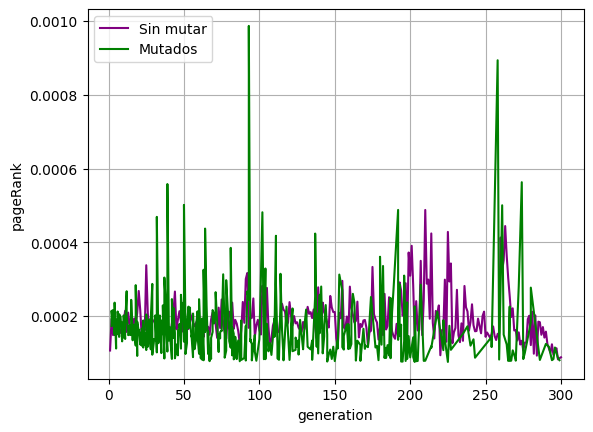

In [345]:
tm = dr[dr["mutate_y"]==True].index
tf = dr[dr["mutate_y"]==False].index
ti = dr["mutate_y"]
fig, ax = plt.subplots()

ax.plot(dr.n_gen[~ti],dr.pageRank[~ti],color="purple",label="Sin mutar")
ax.plot(dr.n_gen[ti],dr.pageRank[ti],color="green",label="Mutados")
ax.set(xlabel='generation', ylabel='pageRank',
       # title='About as simple as it gets, folks'
       )
ax.grid()
plt.legend()

# fig.savefig("test.png",dpi=300)
plt.show()

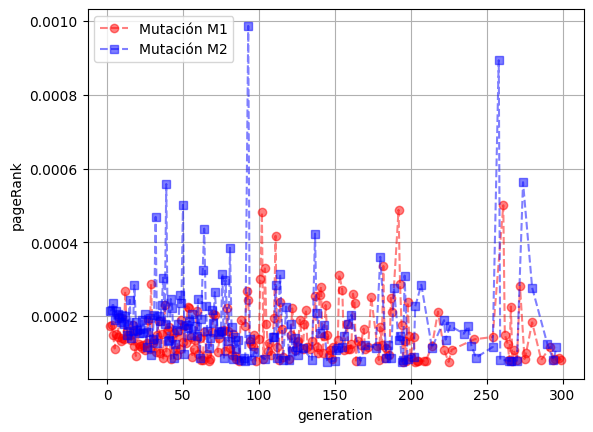

In [346]:
tm = dr[dr["mutate_rate"]=="M1"].index
tf = dr[dr["mutate_rate"]=="M2"].index

fig, ax = plt.subplots()

# ax.scatter(dr.n_gen[tm],dr.pageRank[tm],color="red",label="Mutación M1")
ax.plot(dr.n_gen[tm],dr.pageRank[tm],color="red",label="Mutación M1",linestyle='--', marker='o',alpha=0.5)
# ax.hlines(dr.pageRank[tm].mean(),0,GENS,color="red",label="Media pagerank de M1")
# ax.scatter(dr.n_gen[tf],dr.pageRank[tf],color="blue",label="Mutación M2")
ax.plot(dr.n_gen[tf],dr.pageRank[tf],color="blue",label="Mutación M2",linestyle='--', marker='s',alpha=.5)
# ax.hlines(dr.pageRank[tf].mean(),0,GENS,color="blue")
ax.set(xlabel='generation', ylabel='pageRank',
       # title='About as simple as it gets, folks'
       )
ax.grid()
plt.legend()

# fig.savefig("test.png",dpi=300)
plt.show()

In [269]:
used_columns = ["lifeIter","n_gen","pageRank","pf","iter"]
dfc = dft.loc[:, used_columns]
corr_mat = dfc.corr().stack().reset_index(name="correlation")

In [270]:
corr_mat

,level_0,level_1,correlation
0,lifeIter,lifeIter,1.000000
1,lifeIter,n_gen,0.474037
2,lifeIter,pageRank,0.717277
3,lifeIter,pf,0.004934
4,lifeIter,iter,0.515363
5,n_gen,lifeIter,0.474037
6,n_gen,n_gen,1.000000
7,n_gen,pageRank,0.130673
8,n_gen,pf,0.013522
9,n_gen,iter,0.997817


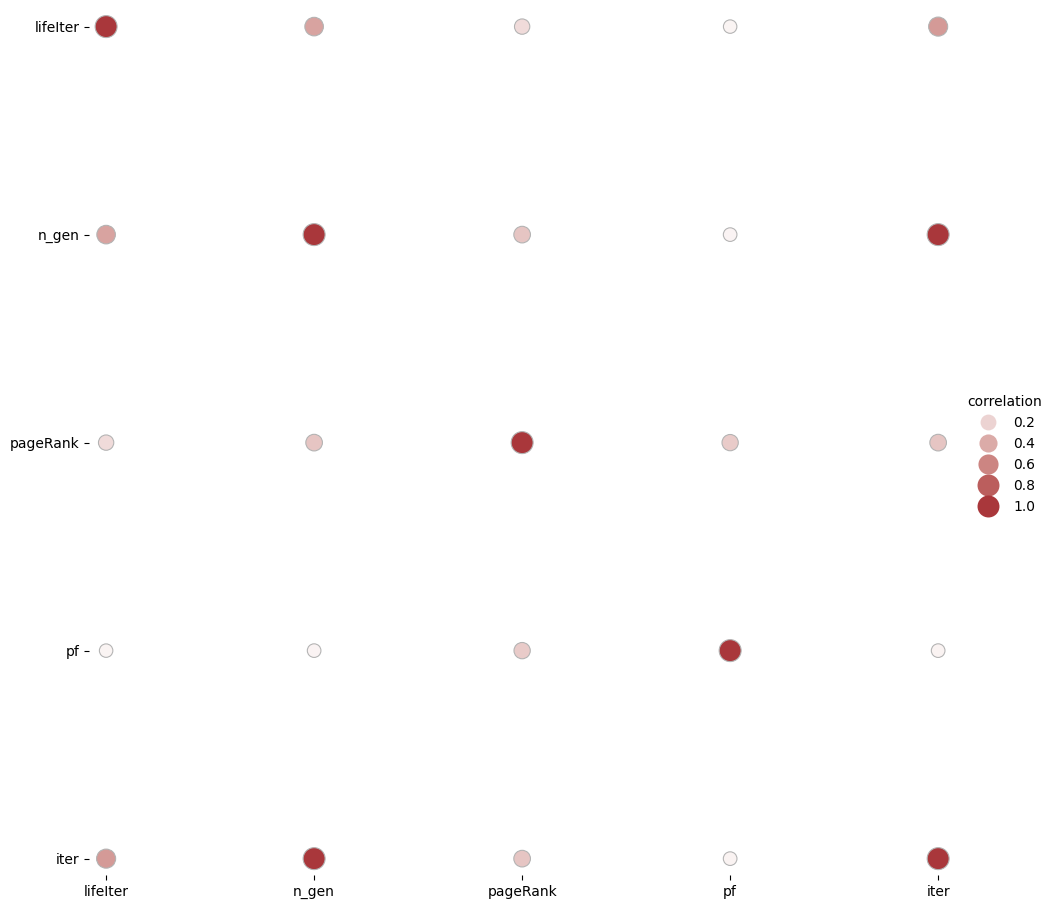

In [125]:
# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)

# Convergencia

In [343]:
import pickle as pkl

CASE = 500
devices = CASE-1
jobs = 9
# df2 = pd.read_pickle('logs/log_ga_pf_convergence'  + str("500v9") + "_" + str(jobs) + '_' + str(devices)+'_0.pkl', 'infer')
df2 = pd.read_pickle('../logs/log_ga_pf_convergence500v9_9_499_0.pkl', 'infer')
df2 = pd.DataFrame(df2)
df2
df2[['f1','f2']] = pd.DataFrame(df2[0].tolist(), index= df2.index)


<Axes: >

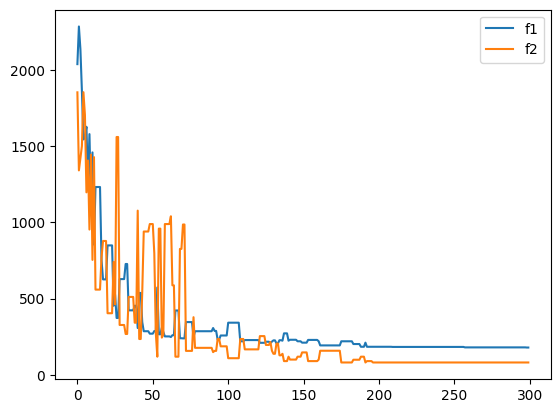

In [344]:
df2[['f1','f2']].plot()